# Heat Equations

## Exact Solution

phi(x,y) = (1-x^2)(1-y^2)

## Steady State

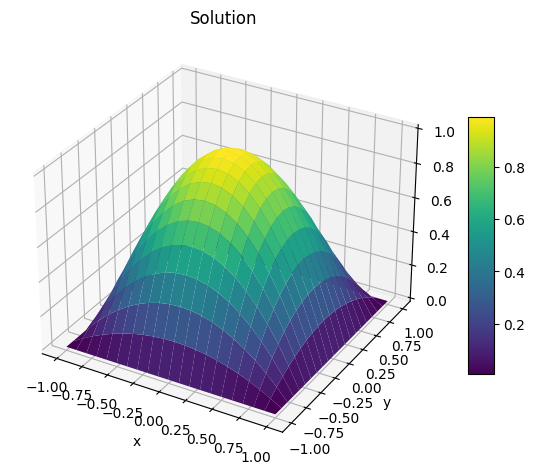

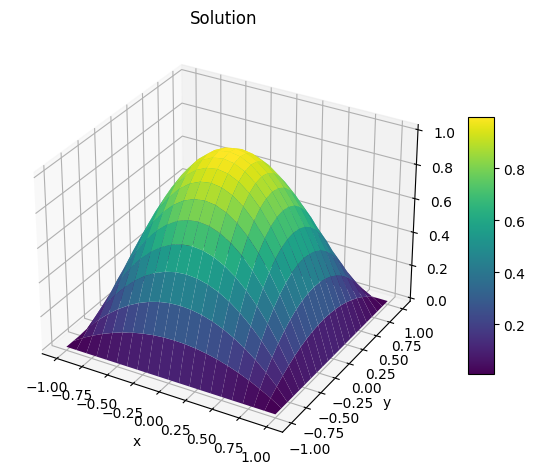

In [13]:
import numpy as np
import matplotlib.pyplot as plt

''' 1. Parameters '''
alpha = 1          # Heat Diffusivity
dx = 0.1           # Grid Size of x
dt = dx**2/4       # Time Step
Nt = 1000*dt       # Time Count

''' 2. Form Meshgrid '''
x,y = np.arange(-1, 1+dx, dx), np.arange(-1, 1+dx, dx)
Nx = np.size(x)
X,Y = np.meshgrid(x, y, indexing='ij')

''' 3. Set Initial Condition & Boundary Condition '''
phi = np.zeros((Nx,Nx))
exact_phi = np.zeros((Nx,Nx))

def setBc(phi):          # All Dirichlet Condition
    phi[:,Nx-1] = 0      # Top
    phi[:,0] = 0         # Bottom
    phi[0,:] = 0         # Left
    phi[Nx-1,:] = 0      # Right

''' 4. Exact Solution at Steady State '''
def exact(x,y):
    for i in range(Nx):
        for j in range(Nx):
            exact_phi[i,j] = (x[i]**2 - 1) * (y[j]**2 - 1)
    return exact_phi

''' 5. 2nd-order Central Scheme at Space & Crank-Nicolson Scheme at Time '''
def create_block_tridiag(r):
    mat1 = np.diag([1+4*r]*Nx) + np.diag([-r]*(Nx-1), 1) + np.diag([-r]*(Nx-1), -1)
    mat2 = np.diag([-r]*Nx)
    bigmat = np.zeros((Nx*Nx, Nx*Nx))
    for i in range(bigmat.shape[0]//Nx):
        m = int(i*Nx)
        bigmat[m:m+Nx, m:m+Nx] = mat1
        if i == 0:
            k = m+Nx
            bigmat[m:m+Nx, k:k+Nx] = mat2
        elif i == bigmat.shape[0]//Nx-1:
            k = m-Nx
            bigmat[m:m+Nx, k:k+Nx] = mat2
        else:
            bigmat[m:m+Nx, m-Nx:m] = mat2
            bigmat[m:m+Nx, m+Nx:m+2*Nx] = mat2
    return bigmat

def create_RHS(r,x,y,phi):
    rhs = np.zeros((Nx, Nx))
    for i in range(1, Nx-1):
        for j in range(1, Nx-1):
            S = 2*(2 - x[i]**2 - y[j]**2)
            rhs[i,j] = r*phi[i+1,j] + r*phi[i,j+1] + (1-4*r)*phi[i,j] + r*phi[i-1,j] + r*phi[i,j-1] + S*dt
    return rhs
    
def CTCS(phi):
    r = alpha*dt/(2*dx**2)
    bigmat = create_block_tridiag(r)
    rhs = np.reshape(create_RHS(r,x,y,phi), Nx*Nx)
    new_phi = np.reshape(np.linalg.solve(bigmat, rhs), (Nx, Nx))
    return new_phi

''' 6. Plot '''
def plot(phi):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    surf = ax.plot_surface(X, Y, phi, cmap = 'viridis')
    fig.colorbar(surf, shrink=0.6, aspect=10)
    plt.title('Solution')
    plt.tight_layout()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
''' 7. Operation '''
exact_phi = exact(x,y)
plot(exact_phi)
time = 0
while time <= Nt:
    phi = CTCS(phi)
    setBc(phi)
    time += dt
plot(phi)

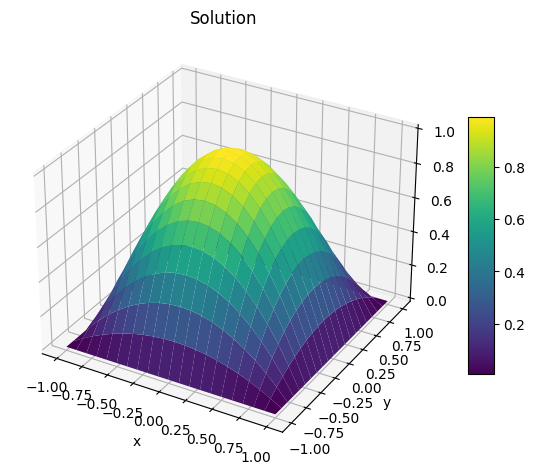

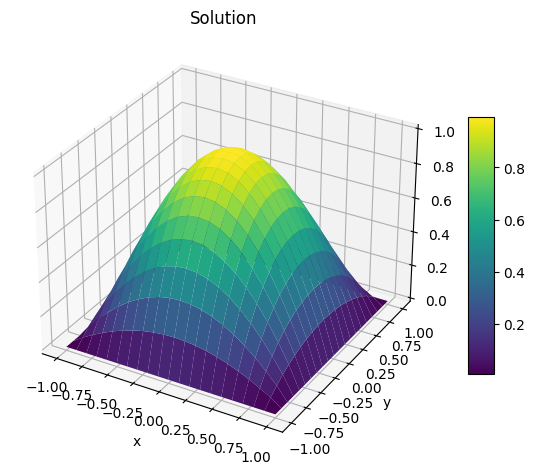

In [8]:
import numpy as np
import matplotlib.pyplot as plt

''' 1. Parameters '''
alpha = 1          # Heat Diffusivity
dx = 0.1           # Grid Size of x
dt = dx**2/4       # Time Step
Nt = 1000*dt       # Time Count

''' 2. Form Meshgrid '''
x,y = np.arange(-1, 1+dx, dx), np.arange(-1, 1+dx, dx)
Nx = np.size(x)
X,Y = np.meshgrid(x, y, indexing='ij')

''' 3. Set Initial Condition & Boundary Condition '''
phi = np.zeros((Nx,Nx))
exact_phi = np.zeros((Nx,Nx))

def setBc(phi):          # All Dirichlet Condition
    phi[:,Nx-1] = 0      # Top
    phi[:,0] = 0         # Bottom
    phi[0,:] = 0         # Left
    phi[Nx-1,:] = 0      # Right

''' 4. Exact Solution at Steady State '''
def exact(x,y):
    for i in range(Nx):
        for j in range(Nx):
            exact_phi[i,j] = (x[i]**2 - 1) * (y[j]**2 - 1)
    return exact_phi

''' 5. 2nd-order Central Scheme at Space & Crank-Nicolson Scheme at Time '''
def approx_Factor(phi):
    r = alpha*dt/(2*dx**2)
    part1 = np.zeros_like(phi)
    part2 = np.zeros_like(phi)

    for i in range(1,Nx-1):
        for j in range(1,Nx-1):
            part1[i,j] = r*phi[i,j+1] + (1-2*r)*phi[i,j] + r*phi[i,j-1]
            
    for i in range(1,Nx-1):
        for j in range(1,Nx-1):
            S = 2*(2 - x[i]**2 - y[j]**2)
            part2[i,j] = r*part1[i+1,j] + (1-2*r)*part1[i,j] + r*part1[i-1,j] + S*dt
    
    diag_p3 = np.diag([1+2*r]*Nx) + np.diag([-r]*(Nx-1), 1) + np.diag([-r]*(Nx-1), -1)
    part3 = np.linalg.solve(diag_p3, part2)
    new_phi = np.linalg.solve(diag_p3, part3)
    
    return new_phi

''' 6. Plot '''
def plot(phi):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    surf = ax.plot_surface(X, Y, phi, cmap = 'viridis')
    fig.colorbar(surf, shrink=0.6, aspect=10)
    plt.title('Solution')
    plt.tight_layout()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
''' 7. Operation '''
exact_phi = exact(x,y)
plot(exact_phi)
time = 0
while time <= Nt:
    phi = approx_Factor(phi)
    setBc(phi)
    time += dt
plot(phi)

## Order of Accuracy

In [164]:
import numpy as np
import matplotlib.pyplot as plt

''' 1. Parameters '''
alpha = 1          # Heat Diffusivity
dt = 0.00001       # Time Step
Nt = 2             # Time Count

''' 2. Form Meshgrid '''
x,y = np.linspace(-1, 1, 15), np.linspace(-1, 1, 15)
dx = x[1]-x[0]
Nx = np.size(x)
X,Y = np.meshgrid(x, y, indexing='ij')

''' 3. Set Initial Condition & Boundary Condition '''
phi = np.zeros((Nx,Nx))
exact_phi = np.zeros((Nx,Nx))

def setBc(phi):          # All Dirichlet Condition
    phi[:,Nx-1] = 0      # Top
    phi[:,0] = 0         # Bottom
    phi[0,:] = 0         # Left
    phi[Nx-1,:] = 0      # Right

''' 4. Exact Solution at Steady State '''
def exact(x,y):
    for i in range(Nx):
        for j in range(Nx):
            exact_phi[i,j] = (x[i]**2 - 1) * (y[j]**2 - 1)
    return exact_phi

''' 5. 2nd-order Central Scheme at Space & Crank-Nicolson Scheme at Time '''
def approx_Factor(phi):
    r = alpha*dt/(2*dx**2)
    part1 = np.zeros_like(phi)
    part2 = np.zeros_like(phi)

    for i in range(1,Nx-1):
        for j in range(1,Nx-1):
            part1[i,j] = r*phi[i,j+1] + (1-2*r)*phi[i,j] + r*phi[i,j-1]
            
    for i in range(1,Nx-1):
        for j in range(1,Nx-1):
            S = 2*(2 - x[i]**2 - y[j]**2)
            part2[i,j] = r*part1[i+1,j] + (1-2*r)*part1[i,j] + r*part1[i-1,j] + S*dt
    
    diag_p3 = np.diag([1+2*r]*Nx) + np.diag([-r]*(Nx-1), 1) + np.diag([-r]*(Nx-1), -1)
    part3 = np.linalg.solve(diag_p3, part2)
    new_phi = np.linalg.solve(diag_p3, part3)
    
    return new_phi

''' 6. Plot '''
def plot(phi):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    surf = ax.plot_surface(X, Y, phi, cmap = 'viridis')
    fig.colorbar(surf, shrink=0.6, aspect=10)
    plt.title('Solution')
    plt.tight_layout()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
''' 7. Operation '''
exact_phi = exact(x,y)
time = 0
while time <= Nt:
    phi = approx_Factor(phi)
    setBc(phi)
    time += dt
print(np.abs(exact_phi[int(Nx/2),int(Nx/2)] - phi[int(Nx/2),int(Nx/2)]))

0.011506968730028322


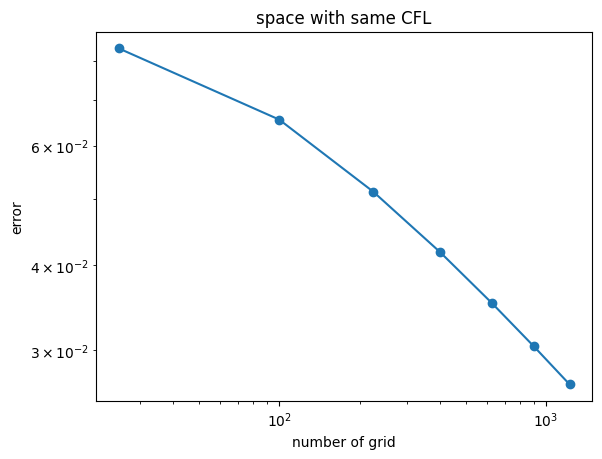

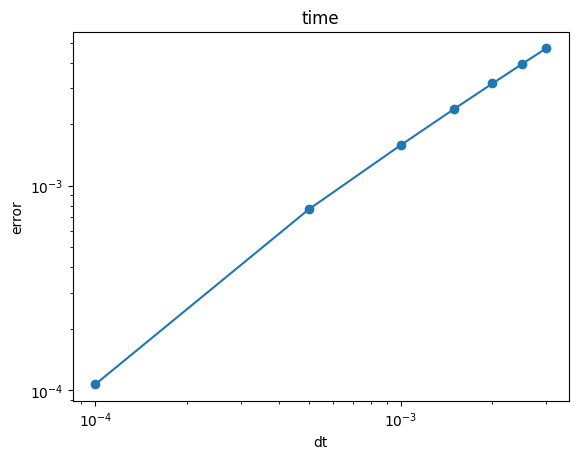

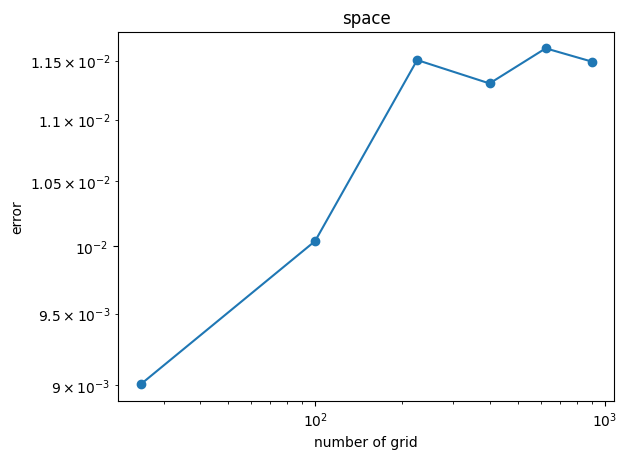

In [163]:
import numpy as np
import matplotlib.pyplot as plt

dt_list = [0.003, 0.0025, 0.002, 0.0015, 0.001, 0.0005, 0.0001]
errors = [0.0046937, 0.0039336, 0.00316, 0.002375, 0.001577, 0.0007658, 0.000107]

dx_list2 = [5**2, 10**2, 15**2, 20**2, 25**2, 30**2]
errors2 = [0.009008, 0.010037, 0.0115069, 0.0113054, 0.0116092, 0.011494]



dx_list = [5**2, 10**2, 15**2, 20**2, 25**2, 30**2, 35**2]
errors3 = [0.0834523, 0.0655278, 0.0513259, 0.0418378, 0.0352106, 0.030373, 0.0267]

plt.figure()
plt.plot(dx_list,errors3, 'o-')
plt.title('space with same CFL')
plt.xlabel('number of grid')
plt.ylabel('error')
plt.loglog()
plt.show()

plt.figure()
plt.plot(dt_list,errors, 'o-')
plt.title('time')
plt.xlabel('dt')
plt.ylabel('error')
plt.loglog()
plt.show()

plt.figure()
plt.plot(dx_list2, errors2, 'o-')
plt.title('space')
plt.xlabel('number of grid')
plt.ylabel('error')
plt.loglog()
plt.show()